# Data Loading

In [48]:
#importing Packagese
import numpy as np
import pandas as pd
import spacy
import re
import string
import inflect
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import SnowballStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
file_path="reviews_badminton//data.csv"
df=pd.read_csv(file_path)
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [10]:
#remove duplicates
df.drop_duplicates()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [11]:
#missing values
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

# feature selection

In [14]:
#remove reviewer name as it is not required for training machine 
df.drop(columns='Reviewer Name',inplace=True)

In [15]:
# Unique type of buyers
df['Place of Review'].str.split(',').str[0].unique()

array(['Certified Buyer'], dtype=object)

In [16]:
df['Place of Review'].str.split(',').str[1].unique()

array([' Chirakkal', ' Hyderabad', ' Dharmapuri', ..., ' Thiruppuvanam',
       ' Singaperumal Koil', ' Raebareli'], dtype=object)

In [17]:
len(df['Place of Review'].str.split(',').str[1].unique())

2262

In [18]:
#removing place of review column as it is not required to train the model as there are many places 
df.drop(columns='Place of Review',inplace=True)


In [19]:
#splitting column month into month and year
df['Year'] = df['Month'].str.split(' ').str[1]
df['Month'] = df['Month'].str.split(' ').str[0]

# creating  sentiment column based on ratings

In [20]:
def Sentiment_of(x):
    if x<=2: return 'Negative'
    elif x==3: return 'Neutral'
    else: return 'Positive'
    
df['Sentiment']=df['Ratings'].apply(Sentiment_of)

In [21]:
df

,Review Title,Up Votes,Down Votes,Month,Review text,Ratings,Year,Sentiment
0,Nice product,889.0,64.0,Feb,"Nice product, good quality, but price is now r...",4,2021,Positive
1,Don't waste your money,109.0,6.0,Feb,They didn't supplied Yonex Mavis 350. Outside ...,1,2021,Negative
2,Did not meet expectations,42.0,3.0,Apr,Worst product. Damaged shuttlecocks packed in ...,1,2021,Negative
5,Mind-blowing purchase,173.0,45.0,Oct,Good quality product. Delivered on time.READ MORE,5,2018,Positive
6,Must buy!,403.0,121.0,Jan,BEST PURCHASE It is a good quality and is more...,5,2020,Positive
...,...,...,...,...,...,...,...,...
8495,Nice,0.0,0.0,Oct,Thanks to the delivery boy ... Service is alwa...,5,2016,Positive
8496,Good choice,0.0,0.0,Oct,Over priced even after 50% discount price is m...,1,2016,Negative
8497,Awesome,0.0,0.0,Oct,Too much priced. It was getting me for Rs. 640...,1,2016,Negative
8499,High cost,0.0,0.0,Dec,Hii flipkart customers care..why your delivery...,5,2015,Positive


# load cleaned data into a data file

In [22]:
# Save the cleaned data in a new csv file called cleaned reviews.csv 
df.to_csv(r'reviews_badminton/cleaned_data.csv')

# Data Analysis

In [23]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8013.000000,8013.000000,8013.000000
mean,0.386747,0.123424,4.198178
std,11.849649,3.334320,1.244423
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


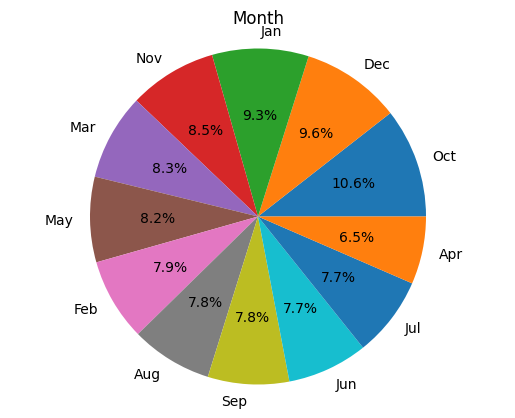

In [26]:
plt.pie(df['Month'].value_counts(), labels=df['Month'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Month')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

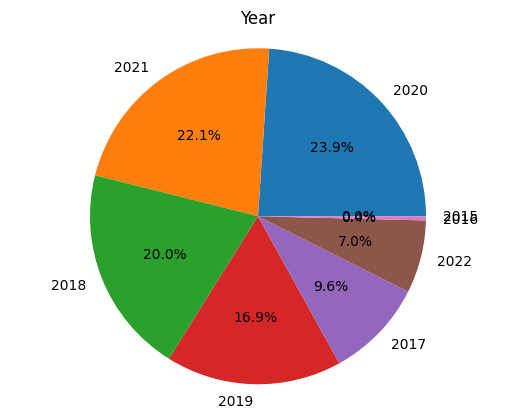

In [27]:
plt.pie(df['Year'].value_counts(), labels=df['Year'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Year')
plt.show()

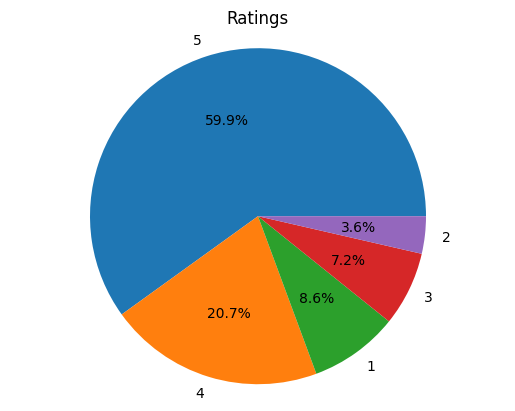

In [29]:
plt.pie(df['Ratings'].value_counts(), labels=df['Ratings'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ratings')
plt.show()

<Axes: xlabel='Month', ylabel='count'>

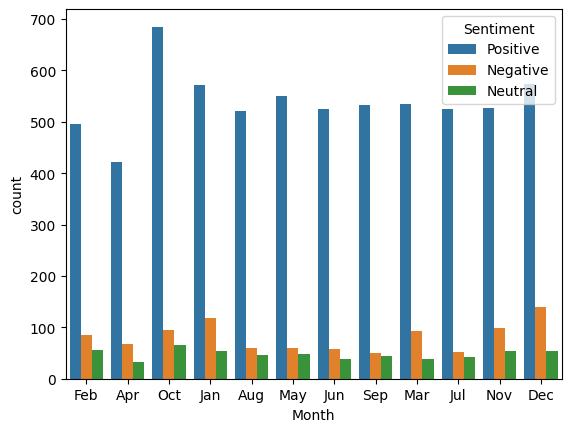

In [32]:
#relation between month and senriment
sns.countplot(x=df['Month'],hue=df['Sentiment'])

<Axes: xlabel='Year', ylabel='count'>

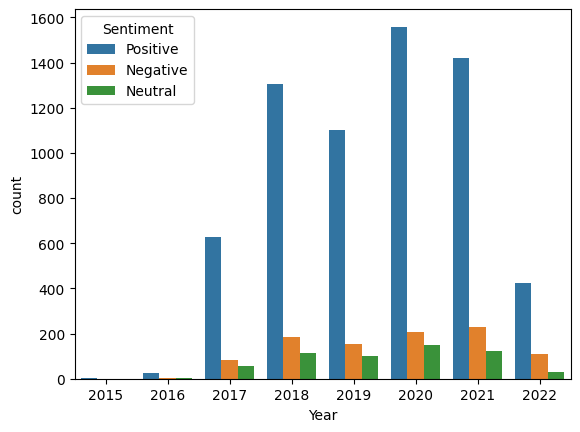

In [33]:
##relation between Year and senriment
sns.countplot(x=df['Year'],hue=df['Sentiment'],order=np.sort(df['Year'].unique()))

In [62]:
# Combine title and review text as one review
df['Review'] = df['Review Title'] + ' ' + df['Review text']
# Remove title and review text column
df.drop(columns=['Review Title','Review text'],inplace=True)

In [63]:
# Let's create a new dataframe
years=np.sort(df['Year'].unique())

def getPercentages(years):
    negatives, neutrals, positives=[],[],[]
    for year in years:
        total=df[df['Year']==year].shape[0]
        negative=df[(df['Year']==year) & (df['Sentiment']=='Negative')].shape[0]
        positive=df[(df['Year']==year) & (df['Sentiment']=='Positive')].shape[0]
        neutral=df[(df['Year']==year) & (df['Sentiment']=='Neutral')].shape[0]
        negatives.append((negative/total)*100)
        neutrals.append((neutral/total)*100)
        positives.append((positive/total)*100)
    return negatives,neutrals,positives

negatives,neutrals,positives=getPercentages(years)
print(negatives,neutrals,positives)


[0.0, 12.903225806451612, 10.835509138381202, 11.519302615193027, 11.35693215339233, 10.896767466110532, 13.021420518602028, 19.607843137254903] [0.0, 9.67741935483871, 7.310704960835509, 7.160647571606475, 7.448377581120943, 7.820646506777893, 6.820744081172492, 5.169340463458111] [100.0, 77.41935483870968, 81.8537859007833, 81.3200498132005, 81.19469026548673, 81.28258602711156, 80.15783540022548, 75.22281639928698]


In [64]:
rating_per_year=pd.DataFrame(data={"Year":years,"Negative":negatives,"Neutral":neutrals,"Positive":positives})
rating_per_year

,Year,Negative,Neutral,Positive
0,2015,0.000000,0.000000,100.000000
1,2016,12.903226,9.677419,77.419355
2,2017,10.835509,7.310705,81.853786
3,2018,11.519303,7.160648,81.320050
4,2019,11.356932,7.448378,81.194690
5,2020,10.896767,7.820647,81.282586
6,2021,13.021421,6.820744,80.157835
7,2022,19.607843,5.169340,75.222816


In [65]:
rating_per_year['Pos-Neg']=rating_per_year['Positive']-rating_per_year['Negative']
rating_per_year

,Year,Negative,Neutral,Positive,Pos-Neg
0,2015,0.000000,0.000000,100.000000,100.000000
1,2016,12.903226,9.677419,77.419355,64.516129
2,2017,10.835509,7.310705,81.853786,71.018277
3,2018,11.519303,7.160648,81.320050,69.800747
4,2019,11.356932,7.448378,81.194690,69.837758
5,2020,10.896767,7.820647,81.282586,70.385819
6,2021,13.021421,6.820744,80.157835,67.136415
7,2022,19.607843,5.169340,75.222816,55.614973


<Axes: xlabel='Year', ylabel='Negative'>

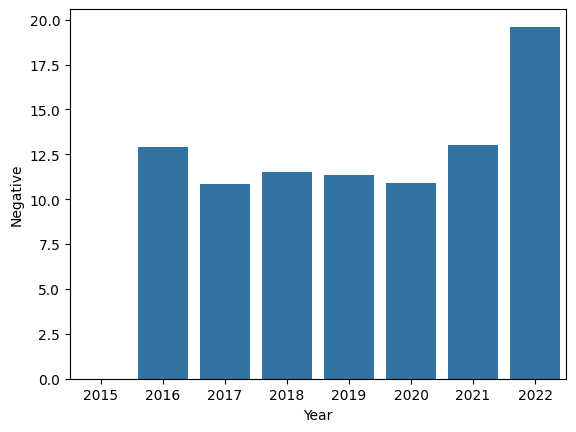

In [66]:
sns.barplot(data=rating_per_year,x='Year',y='Negative')

In [68]:
# Create a new df
new_df=df[['Review','Sentiment']].copy()
new_df

,Review,Sentiment
0,"Nice product Nice product, good quality, but p...",Positive
1,Don't waste your money They didn't supplied Yo...,Negative
2,Did not meet expectations Worst product. Damag...,Negative
5,Mind-blowing purchase Good quality product. De...,Positive
6,Must buy! BEST PURCHASE It is a good quality a...,Positive
...,...,...
8495,Nice Thanks to the delivery boy ... Service is...,Positive
8496,Good choice Over priced even after 50% discoun...,Negative
8497,Awesome Too much priced. It was getting me for...,Negative
8499,High cost Hii flipkart customers care..why you...,Positive


In [69]:
new_df.to_csv(r'reviews_badminton/reviews_and_sentiment.csv')

# Text preprocessing

In [70]:
def text_preprocessing(corpus,flag):
    
    # change  of numbers
    p=inflect.engine()
    corpus=re.sub(r'\d+',lambda x: p.number_to_words(x.group(0)),corpus)
    
    # remove special characters
    corpus=re.sub('[^a-zA-Z]',' ',corpus)
    
    #convert to lower case
    corpus=corpus.lower()
    
    # removal of whitespaces
    corpus=' '.join(corpus.split())

    #tokenize
    words=word_tokenize(corpus)
    if flag=="stemming":
    #stemming
        stemmer=SnowballStemmer(language='english')
        return ' '.join(stemmer.stem(word) for word in words if word not in set(nltk.corpus.stopwords.words('english')))
    else:
    #lemmatization
        lemmatizer=WordNetLemmatizer()
        return ' '.join(lemmatizer.lemmatize(word) for word in words if word not in set(nltk.corpus.stopwords.words('english')))


In [72]:
new_df['Review']=new_df['Review'].apply(lambda x: text_preprocessing(x,flag="stemming"))

In [96]:
new_df

,Review,Sentiment
0,nice product nice product good qualiti price r...,Positive
1,wast money suppli yonex mavi three hundr fifti...,Negative
2,meet expect worst product damag shuttlecock pa...,Negative
5,mind blow purchas good qualiti product deliv t...,Positive
6,must buy best purchas good qualiti durabl aver...,Positive
...,...,...
8495,nice thank deliveri boy servic alway awesom read,Positive
8496,good choic price even fifti discount price muc...,Negative
8497,awesom much price get rs six hundr forti home ...,Negative
8499,high cost hii flipkart custom care deliveri bo...,Positive


In [116]:
new_df['Sentiment'].value_counts()

Sentiment
Positive    6462
Negative     976
Neutral      575
Name: count, dtype: int64

# Step 1 - Identify Input and Output

In [118]:
# Step 1: Identify Input and Output

X = new_df['Review'] # the column text contains textual data to extract features from
y = new_df['Sentiment'] # this is the column we are learning to predict. 
y=y.map({'Positive':1,'Negative':0,'Neutral':1})
print(X.shape, y.shape)

(8013,) (8013,)


# Step 2 - Split the Data into Train and Test


In [119]:
# Step 2: Split the data into train and test

from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6009,) (6009,)
(2004,) (2004,)


# Step 3 - Data Preprocessing on train data (X_train)

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

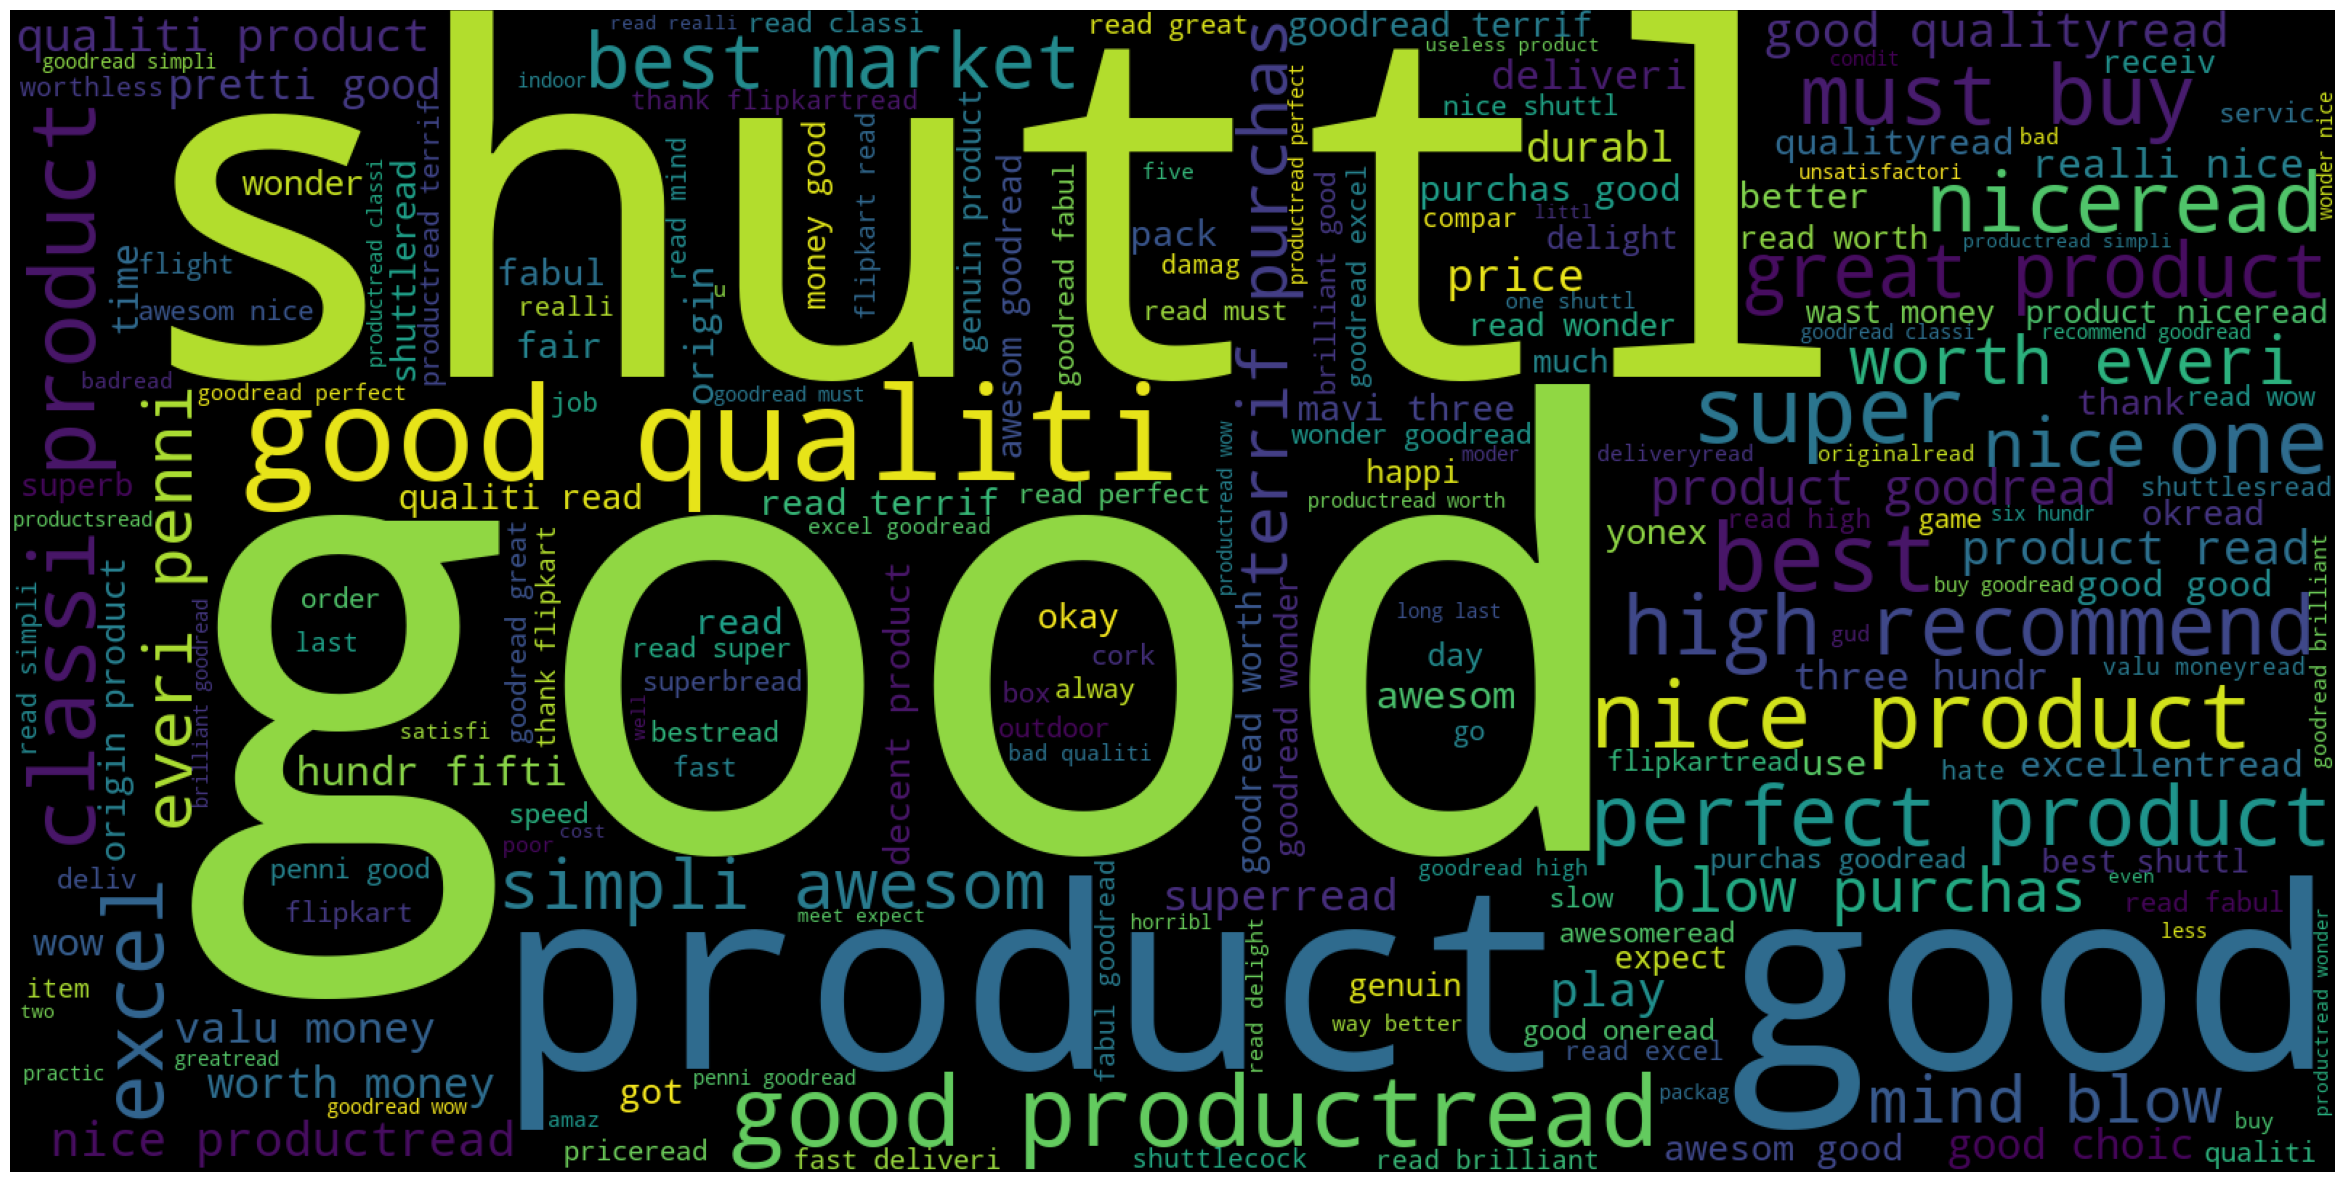

In [121]:
# Display the wordcloud 

display_wordcloud(X_train[y_train==1])

In [122]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [123]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [124]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 812 ms
Wall time: 3.11 s
(6009, 2322)


# Step 4 - Data Preprocessing on test data (X_test)

In [125]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2004, 2322)


# Step 5 - Building a Model (i.e. Train the classifier)

In [126]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 18.1 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [127]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9237809951739058

In [128]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 397,  330],
       [ 128, 5154]], dtype=int64)

In [130]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [137]:
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ] ),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score on Test Data:  0.9455048409405256
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Score on Test Data:  0.949656121045392
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Score on Test Data:  0.9294460641399417


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [138]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [143]:
import joblib
import os
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 26 ms
Test Score (F1) 0.9455048409405256
Model Size: 133930 Bytes
********** decision_tree **********


CPU times: total: 0 ns
Wall time: 20.3 ms
Test Score (F1) 0.949656121045392
Model Size: 68060 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 15.1 ms
Test Score (F1) 0.9294460641399417
Model Size: 82365 Bytes


In [144]:
X_train

6808                   wonder rate high price offlin read
8262    valu money shuttl v gud v nice price v durable...
4446                fabul good qualiti origin shuttleread
4366                             high recommend good read
4376                      realli nice best experienceread
                              ...                        
8406     nice product product good got best price fk read
5652                                    must buy goodread
4440                              great product superread
254     great product love realli guuda well fantast d...
5617                                  wast money goodread
Name: Review, Length: 6009, dtype: object

In [148]:
sentiment


array([1], dtype=int64)

In [151]:
text=input('Enter text')
cleaned_text=text_preprocessing(text,'stemming')
with open(r'best_models/decision_tree.pkl','rb') as f:
    model=joblib.load(f)
    sentiment=model.predict([cleaned_text])


In [152]:
sentiment[0]

0